### References

Formulae based on this paper: https://ssd.jpl.nasa.gov/txt/aprx_pos_planets.pdf

Solar system simulator to compare my calculations: https://theskylive.com/3dsolarsystem

Small body database: https://ssd.jpl.nasa.gov/?sb_elem and https://ssd.jpl.nasa.gov/sbdb_query.cgi#x

Orbital elements summary: https://en.wikipedia.org/wiki/Orbital_elements

Some clues for Pluto's position problem (was working on that at last):
- http://cosinekitty.com/solar_system.html
- http://www.stjarnhimlen.se/comp/ppcomp.html#2
- https://web.archive.org/web/20050308023646/http://www.xylem.f2s.com/kepler/kepler.html
- http://cdsarc.u-strasbg.fr/viz-bin/qcat?VI/

In [1]:
%pylab qt
%matplotlib inline

import pandas
import astropy.constants as const
import datetime

from celestialbody import CelestialBody

mercury = CelestialBody("Mercury")
venus   = CelestialBody("Venus")
earth   = CelestialBody("EM Bary")
mars    = CelestialBody("Mars")
jupiter = CelestialBody("Jupiter")
saturn  = CelestialBody("Saturn")
uranus  = CelestialBody("Uranus")
neptune = CelestialBody("Neptune")
pluto   = CelestialBody("Pluto")

planets = [mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto]

Populating the interactive namespace from numpy and matplotlib


In [2]:
import celestialbody
celestialbody.update_numbered_asteroids_params()

Ceres      {'category': 'asteroid', 'number': 1, 'modifie...
Pallas     {'category': 'asteroid', 'number': 2, 'modifie...
Juno       {'category': 'asteroid', 'number': 3, 'modifie...
Vesta      {'category': 'asteroid', 'number': 4, 'modifie...
Astraea    {'category': 'asteroid', 'number': 5, 'modifie...
                                 ...                        
Aegle      {'category': 'asteroid', 'number': 96, 'modifi...
Klotho     {'category': 'asteroid', 'number': 97, 'modifi...
Ianthe     {'category': 'asteroid', 'number': 98, 'modifi...
Dike       {'category': 'asteroid', 'number': 99, 'modifi...
Hekate     {'category': 'asteroid', 'number': 100, 'modif...
Length: 100, dtype: object

In [81]:
for planet in planets:
    planet.date = datetime.datetime(2000, 1, 1, 12)
    print(planet.name, planet.L0-planet.varpi0)

Mercury 174.79394829
Venus 50.21215136999999
EM Bary -2.4631431299999917
Mars 19.3493162
Jupiter 20.059839080000003
Saturn -42.78564733999999
Uranus 141.76872184
Neptune 257.54130563
Pluto 14.86832412999999


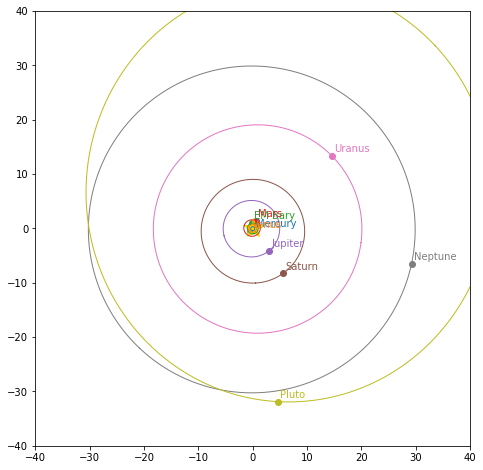

In [70]:
plt.figure(figsize=(12,8))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))
ax.set_aspect("equal")
a_lim = 40
ax.set_xlim(-a_lim,a_lim)
ax.set_ylim(-a_lim,a_lim)
ax.plot([0],[0], "*", color="gold", markersize=20)

date = datetime.datetime(2021,1,1,12)
for i, planet in enumerate(planets):
    planet.date = date
    x,y,z = planet.position
    plt.scatter(x,y, marker="o", color="C"+str(i))
    X,Y,Z = planet.orbit
    plt.plot(X,Y, color="C0"+str(i), linewidth=1)
    if planet.a < a_lim:
        plt.annotate(planet.name, (x,y), color="C0"+str(i), textcoords="offset points", xytext=(2,2),
                     fontsize="medium", horizontalalignment='left', verticalalignment='bottom', alpha=1)

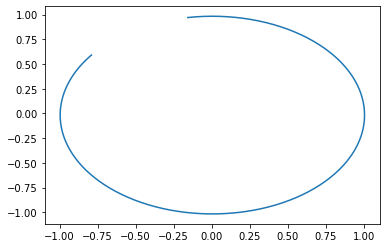

In [6]:
start = datetime.datetime(2021,2,12)
stop  = datetime.datetime(2021,12,31)

x, y, z, n = earth.trajectory(start, stop, 1)

plt.plot(x,y)

In [29]:
%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x,y,z)
ax.set_zlim(-1,1)

TypeError: object of type 'numpy.float64' has no len()

In [39]:
fig = plt.figure()
sps = (1,1)
ax = fig.add_subplot(111, projection='3d')
a_lim = 40
ax.set_xlim(-a_lim,a_lim)
ax.set_ylim(-a_lim,a_lim)
ax.set_zlim(-a_lim,a_lim)

ax.plot([0],[0], "o", color="gold")

date = datetime.datetime(2021,2,12)
for i, planet in enumerate(planets):
    planet.date = date
    x,y,z = planet.position
    ax.scatter(x,y,z, marker="o", color="C"+str(i))
    X,Y,Z = planet.orbit
    ax.plot(X,Y,Z, color="C0"+str(i), linewidth=1,label=planet.name)
ax.legend()

In [16]:
Z

array([-13.29884953, -13.27006473, -13.24086068, ..., -13.35515683,
       -13.32721394, -13.29884953])

In [18]:
40*np.tan(np.pi*17/180)

12.229227258346416